### Inference Notebook

In [1]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

base_model = 'stable-diffusion-v1-5/stable-diffusion-v1-5'
lora_adapter = 'SurAyush/StableEmote-lora'
pipe = StableDiffusionPipeline.from_pretrained(base_model, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [2]:
pipe.unet.load_attn_procs(lora_adapter)
pipe.to("cuda")

pytorch_lora_weights.safetensors:   0%|          | 0.00/3.23M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/diffusers/loaders/unet.py:214: FutureWarning: `load_attn_procs` is deprecated and will be removed in version 0.40.0. Using the `load_attn_procs()` method has been deprecated and will be removed in a future version. Please use `load_lora_adapter()`.
  deprecate("load_attn_procs", "0.40.0", deprecation_message)


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.35.2",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [14]:
pipe.safety_checker = None

In [15]:
prompt = "An emoji of smiling face with open mouth"
result = pipe(prompt, num_inference_steps=50, num_images_per_prompt=2)

for i, image in enumerate(result.images):
    filename = f"smiling_face_with_open_mouth_{i+1}.png"
    image.save(filename)
    print(f"Saved {filename}")

  0%|          | 0/50 [00:00<?, ?it/s]

Saved smiling_face_with_open_mouth_1.png
Saved smiling_face_with_open_mouth_2.png


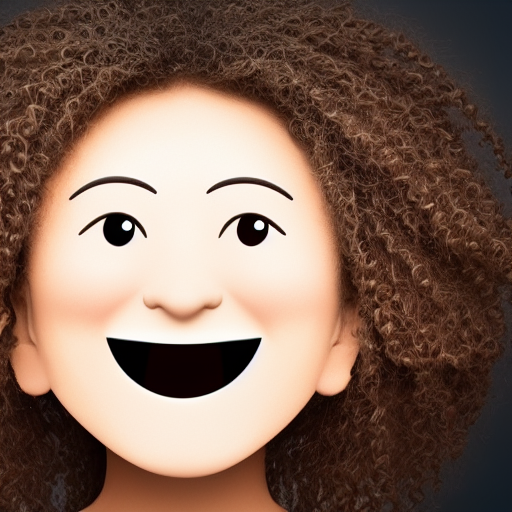

In [16]:
result.images[0]

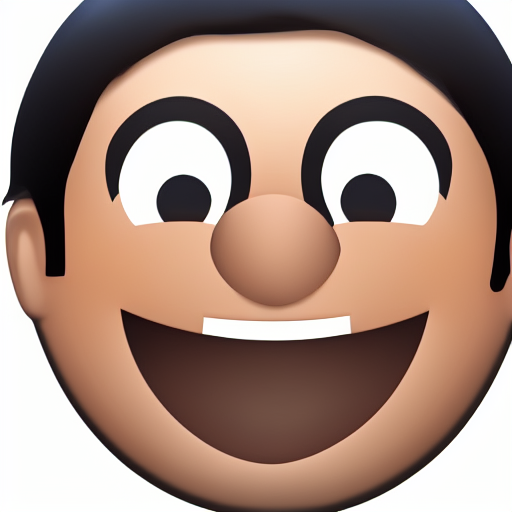

In [17]:
result.images[1]

In [24]:
prompt2 = "An emoji of winking face"
result2 = pipe(prompt2, num_inference_steps=30, num_images_per_prompt=2)

for i, image in enumerate(result2.images):
    filename = f"winking_face_{i+1}.png"
    image.save(filename)
    print(f"Saved {filename}")

  0%|          | 0/30 [00:00<?, ?it/s]

Saved winking_face_1.png
Saved winking_face_2.png


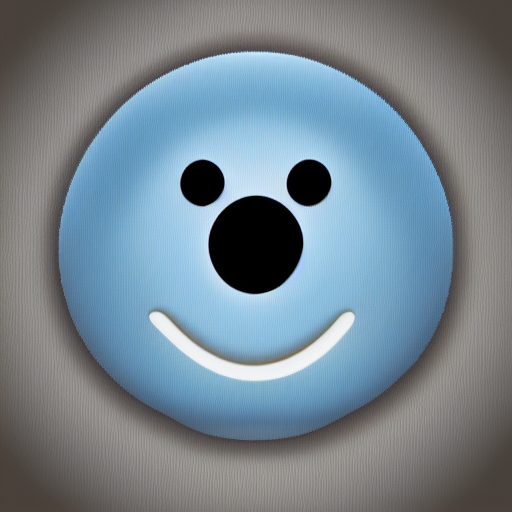

In [25]:
result2.images[0]

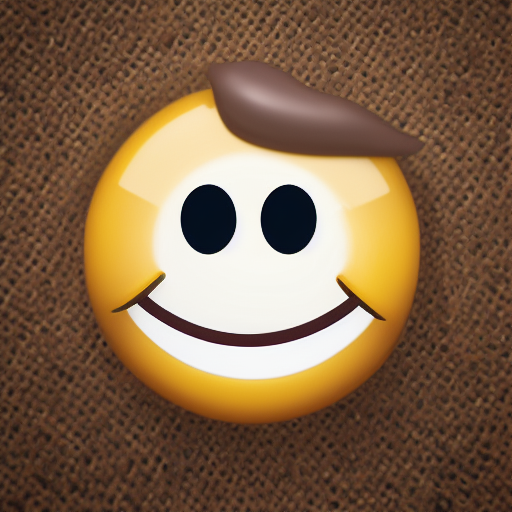

In [26]:
result2.images[1]

In [27]:
prompt3 = "An emoji of a robot face"
result3 = pipe(prompt3, num_inference_steps=30, num_images_per_prompt=2)

for i, image in enumerate(result3.images):
    filename = f"robot_face{i+1}.png"
    image.save(filename)
    print(f"Saved {filename}")

  0%|          | 0/30 [00:00<?, ?it/s]

Saved robot_face1.png
Saved robot_face2.png


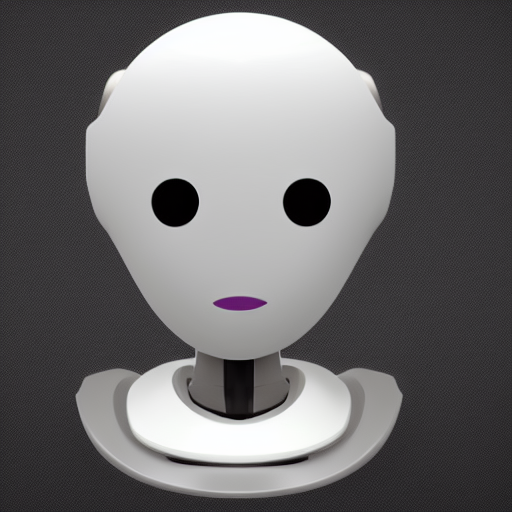

In [28]:
result3.images[0]

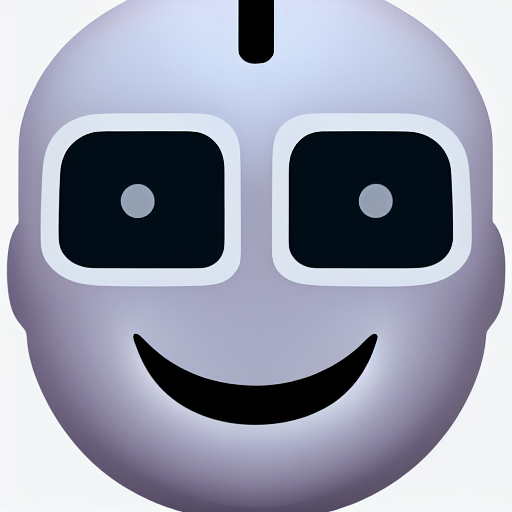

In [29]:
result3.images[1]